In [2]:
import Pkg
Pkg.add("Clustering")

   Resolving package versions...
   Installed NearestNeighbors ─ v0.4.16
   Installed Clustering ─────── v0.15.7
    Updating `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  [aaaa29a8] + Clustering v0.15.7
    Updating `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
  [aaaa29a8] + Clustering v0.15.7
  [b8a86587] + NearestNeighbors v0.4.16
Precompiling project...
  ✓ NearestNeighbors
  ✓ Clustering
  2 dependencies successfully precompiled in 24 seconds. 395 already precompiled.


In [514]:
using Clustering
using CSV
using DataFrames
using Statistics
using StatsBase
using TimeSeries
using HiddenMarkovModels
using  Plots


In [273]:
acwi = Matrix(CSV.read("../sb_gbi/equity_scenarios.csv",DataFrame))

99999×50 Matrix{Float64}:
  0.183608   0.040727   0.130638  …   0.310636   0.259417   0.106576
  0.057796  -0.015669   0.01473       0.181475   0.038817   0.09112
 -0.042034   0.071062   0.211914      0.271774   0.03051    0.014144
  0.048233   0.002585   0.069304      0.161997   0.150916  -0.458586
 -0.097277   0.278737   0.249458      0.054621   0.20249    0.148626
  0.168582   0.058298   0.174671  …  -0.057467  -0.037438   0.030723
  0.096997   0.214256  -0.246285      0.148997   0.192833   0.181174
  0.254872   0.054849   0.014113      0.13077    0.066608  -0.076274
  0.263792   0.213822   0.260164      0.309639   0.022386   0.268776
  0.065249  -0.206639   0.347267      0.165357   0.180862   0.298468
  ⋮                               ⋱                        
  0.304079  -0.004624   0.041851  …  -0.008278   0.136057   0.139732
  0.261117   0.094383  -0.240846      0.037133  -0.072158  -0.037526
 -0.050816   0.211829  -0.100711      0.158417  -0.021944   0.318735
  0.370563   0.279

In [274]:
inflation = Matrix(CSV.read("../sb_gbi/inflation_scenarios.csv", DataFrame))[:,2:end]

99999×50 Matrix{Float64}:
 0.035158  0.031416  0.046096  0.018379  …  0.06628   0.09403   0.093851
 0.013222  0.0123    0.043899  0.027086     0.019199  0.021789  0.020151
 0.039912  0.040263  0.035394  0.0123       0.02551   0.0123    0.0123
 0.016048  0.0123    0.0123    0.03366      0.056582  0.0123    0.0123
 0.065174  0.052422  0.071214  0.05068      0.019615  0.058837  0.048566
 0.051986  0.035766  0.026192  0.033541  …  0.052188  0.046143  0.026802
 0.040925  0.025968  0.043467  0.024486     0.0786    0.047548  0.027347
 0.0123    0.045685  0.022954  0.0123       0.019471  0.048676  0.043244
 0.0123    0.014093  0.0123    0.0123       0.037708  0.071717  0.083529
 0.0123    0.046767  0.048754  0.071964     0.058765  0.0123    0.024597
 ⋮                                       ⋱                      
 0.05639   0.034089  0.038381  0.037493  …  0.037054  0.031733  0.02699
 0.022314  0.042175  0.031607  0.039552     0.060712  0.045391  0.080075
 0.078099  0.090769  0.052886  0.02624

In [370]:
returns = stack([acwi,inflation],dims=1)

2×99999×50 Array{Float64, 3}:
[:, :, 1] =
 0.183608  0.057796  -0.042034  0.048233  …  0.119115  -0.145221  -0.025328
 0.035158  0.013222   0.039912  0.016048     0.064728   0.027103   0.0123

[:, :, 2] =
 0.040727  -0.015669  0.071062  0.002585  …  0.095772  -0.393472  0.014187
 0.031416   0.0123    0.040263  0.0123       0.058533   0.059451  0.027505

[:, :, 3] =
 0.130638  0.01473   0.211914  0.069304  …  -0.292217  0.060243  0.174296
 0.046096  0.043899  0.035394  0.0123        0.036324  0.051567  0.0123

;;; … 

[:, :, 48] =
 0.310636  0.181475  0.271774  0.161997  …  0.084165  0.142273  0.012147
 0.06628   0.019199  0.02551   0.056582     0.0123    0.04997   0.065018

[:, :, 49] =
 0.259417  0.038817  0.03051  0.150916  …  0.118251  0.023003  0.20869
 0.09403   0.021789  0.0123   0.0123       0.035531  0.0123    0.095034

[:, :, 50] =
 0.106576  0.09112   0.014144  -0.458586  …  0.292593  0.115302  0.170179
 0.093851  0.020151  0.0123     0.0123       0.045336  0.0123    0.057752

In [373]:
period_1 = returns[:,:,5] 


2×99999 Matrix{Float64}:
 -0.178384  -0.133039  0.246116  -0.156461  …  0.118621  -0.166405  0.176704
  0.043002   0.050294  0.0123     0.0123       0.031583   0.020833  0.035917

In [374]:
period_1[:,1]

2-element Vector{Float64}:
 -0.178384
  0.043002

In [375]:
n_clusters = 12
result = kmeans(period_1,n_clusters)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.05732827407859913 0.44700307672369144 … 0.12533755957667936 -0.12933353165243305; 0.04005302178782272 0.04048623328149305 … 0.023857938108288373 0.04004329876643657], [10, 12, 6, 12, 4, 7, 8, 4, 12, 11  …  9, 3, 11, 4, 6, 6, 10, 11, 12, 3], [0.0012166480857011136, 0.00011880737145460174, 0.0007990558746499704, 0.0015055901653920067, 6.668979697685082e-5, 0.0004126892444927602, 0.0004117760927620866, 0.0010743612589757083, 0.0018978129089469511, 0.0009786252272971328  …  0.001599726713853833, 0.0001742313130751877, 0.00028886581675417744, 0.00019758033866154427, 0.0022203924597280628, 0.0011765132791824173, 0.0003696126729469118, 0.0001047887537778576, 0.0017433293441404124, 0.0001269171690280041], [9825, 1929, 13123, 13876, 2200, 10225, 7387, 12368, 6140, 4964, 10580, 7382], [9822, 1929, 13127, 13880, 2200, 10225, 7387, 12364, 6141, 4964, 10583, 7377], 96.56955500357674, 100, false)

In [376]:
counts(result)

12-element Vector{Int64}:
  9825
  1929
 13123
 13876
  2200
 10225
  7387
 12368
  6140
  4964
 10580
  7382

In [377]:
centers =result.centers

2×12 Matrix{Float64}:
 -0.0573283  0.447003   0.187174   …  -0.213155  0.125338   -0.129334
  0.040053   0.0404862  0.0400764      0.040238  0.0238579   0.0400433

In [378]:
for cluster in 1:n_clusters
    println("equity: $(centers[1,cluster]), infl: $(centers[2,cluster])")
end

equity: -0.05732827407859913, infl: 0.04005302178782272
equity: 0.44700307672369144, infl: 0.04048623328149305
equity: 0.18717380193494285, infl: 0.04007637693303768
equity: 0.0639074188760809, infl: 0.037551786023053195
equity: -0.3209512604545458, infl: 0.03979883409090907
equity: 0.25065301281173524, infl: 0.04020110014669861
equity: 0.12155981981860034, infl: 0.06843289643969122
equity: 0.006372359915884843, infl: 0.0409767646392741
equity: 0.3277884077511803, infl: 0.041093245888292655
equity: -0.21315480036261059, infl: 0.04023803041901745
equity: 0.12533755957667936, infl: 0.023857938108288373
equity: -0.12933353165243305, infl: 0.04004329876643657


In [379]:
clusters = assignments(result)

99999-element Vector{Int64}:
 10
 12
  6
 12
  4
  7
  8
  4
 12
 11
  ⋮
  3
 11
  4
  6
  6
 10
 11
 12
  3

In [380]:
cluster_means = zeros((2,n_clusters))

for cluster in 1:n_clusters
    cluster_means[:,cluster] = mean(period_1[:,clusters .== cluster],dims=2) 
end


for cluster in 1:n_clusters
    println("$(cluster_means[1,cluster]), $(cluster_means[2,cluster])")
end

-0.05728395735368964, 0.04004270798982135
0.44700307672369144, 0.04048623328149305
0.18718772696791852, 0.04007951428789038
0.06394942432977824, 0.0375427498558647
-0.3209512604545458, 0.03979883409090907
0.25065990826405793, 0.04019924479217538
0.1215678191417356, 0.06843384337349384
0.006420992399741277, 0.04098200137451366
0.3277946592833874, 0.04109597198697153
-0.21315480036261059, 0.04023803041901745
0.12537072277882774, 0.023857441776939114
-0.12930915659712794, 0.0400514490652943


In [381]:
probs = counts(result)/sum(counts(result))

12-element Vector{Float64}:
 0.0982509825098251
 0.01929019290192902
 0.13123131231312313
 0.13876138761387613
 0.022000220002200022
 0.10225102251022511
 0.07387073870738707
 0.12368123681236812
 0.06140061400614006
 0.04964049640496405
 0.10580105801058011
 0.07382073820738208

In [382]:
scenario_period1 = DataFrame(Equity=cluster_means[1,:].*100,EDO=cluster_means[2,:].*100,Probs=probs*100)

Row,Equity,EDO,Probs
,Float64,Float64,Float64
1,-5.7284,4.00427,9.8251
2,44.7003,4.04862,1.92902
3,18.7188,4.00795,13.1231
4,6.39494,3.75427,13.8761
5,-32.0951,3.97988,2.20002
6,25.066,4.01992,10.2251
7,12.1568,6.84338,7.38707
8,0.642099,4.0982,12.3681
9,32.7795,4.1096,6.14006


In [384]:
function cluster(data, n_clusters)
    dt = fit(ZScoreTransform, data, dims=2)
    standarized = StatsBase.transform(dt,data)

    clusters = kmeans(standarized,n_clusters)

    destandarised = StatsBase.reconstruct(dt, clusters.centers)

    probs = counts(clusters)/sum(counts(clusters))

    return destandarised, probs
end

grid, probs = cluster(period_1, 6)
display(DataFrame(grid, :auto))
display(probs)

Row,x1,x2,x3,x4,x5,x6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0881188,0.274149,0.0731374,-0.0855874,0.203957,-0.154778
2,0.0467501,0.0265028,0.0176953,0.0707203,0.074317,0.0272823


6-element Vector{Float64}:
 0.21822218222182221
 0.16828168281682818
 0.22751227512275124
 0.10967109671096711
 0.13432134321343214
 0.14199141991419914

In [396]:
function cluster_moments(data, n_clusters)
    dt = fit(ZScoreTransform, data, dims=2)
    standarized = StatsBase.transform(dt,data)

    clusters = kmeans(standarized,n_clusters)
    c = assignments(clusters)

    cluster_means = zeros(2,n_clusters)
    cluster_cov = zeros(2,2,n_clusters)

    for cluster in 1:n_clusters
        cluster_means[:,cluster] = mean(period_1[:,c .== cluster],dims=2) 
        cluster_cov[:,:,cluster] = cov(period_1[:,c .== cluster],dims=2) 
    end

    return  cluster_means, cluster_cov 
end

means, c_cov = cluster_moments(period_1,8)


([0.061849986063225136 0.25879161298756354 … 0.14891253276174887 0.10060511554241024; 0.01784775496527842 0.01977018817128425 … 0.04504365060391777 0.0817931711668736], [0.003351344641371066 -7.54829588375704e-6; -7.54829588375704e-6 4.332358302289987e-5;;; 0.005574976276326292 7.156499947414419e-5; 7.156499947414419e-5 6.547455084685891e-5;;; 0.0026083531466683093 6.284980570348746e-5; 6.284980570348746e-5 8.51485627465547e-5;;; 0.006834265264966041 0.00023219709841027438; 0.00023219709841027438 0.00020367434168471754;;; 0.005933699012180822 -9.788126245616605e-5; -9.788126245616605e-5 0.00015100253872472573;;; 0.006574102536237531 -0.00010081238088570607; -0.00010081238088570607 9.677173001961664e-5;;; 0.0022453903143033927 -2.5545723893703288e-5; -2.5545723893703288e-5 7.469930565266753e-5;;; 0.006630025995535407 6.004990547869435e-5; 6.004990547869435e-5 0.00018829017949932507])

In [387]:
function guess_init(n_scenarios)
    regimes_probs = rand(1:100,n_scenarios)
    return regimes_probs/sum(regimes_probs)
end

function guess_tmatrix(n_scenarios)
    regimes_probs = rand(1:100,n_scenarios,n_scenarios)
    return regimes_probs ./ sum(regimes_probs,dims=2)
end
function guess_distribution()
    corr = Matrix(1.0I,2,2)
    sigma = [rand(Uniform(0,0.25)),rand(Uniform(0,0.035))]
    means = [rand(Uniform(-0.5,0.5)),rand(Uniform(-0.01,0.12))]
    cov = cor2cov(corr,sigma)
    return MvNormal(means,cov)
end

using LinearAlgebra, Distributions

In [393]:
n_clusters = 8
init_guess = guess_init(n_clusters)
guess_matrix = guess_tmatrix(n_clusters)
guess_dist = [guess_distribution() for s in 1:n_clusters]
hmm_guess = HMM(init_guess, guess_matrix, guess_dist);
println(hmm_guess)
hmm_est_concat, _ = baum_welch(hmm_guess, eachcol(period_1));
println(hmm_est_concat)

Hidden Markov Model with:
 - initialization: [0.0741687979539642, 0.14578005115089515, 0.11508951406649616, 0.16112531969309463, 0.10741687979539642, 0.015345268542199489, 0.21483375959079284, 0.16624040920716113]
 - transition matrix: [0.15803814713896458 0.23160762942779292 0.03814713896457766 0.06267029972752043 0.21798365122615804 0.2724795640326976 0.013623978201634877 0.005449591280653951; 0.15327102803738318 0.03551401869158879 0.17196261682242991 0.11775700934579439 0.11401869158878504 0.11962616822429907 0.10093457943925234 0.18691588785046728; 0.04941860465116279 0.0755813953488372 0.10755813953488372 0.13662790697674418 0.22674418604651161 0.03197674418604651 0.18604651162790697 0.18604651162790697; 0.06756756756756757 0.04594594594594595 0.17027027027027028 0.1 0.23513513513513515 0.1891891891891892 0.14054054054054055 0.051351351351351354; 0.16743119266055045 0.12155963302752294 0.22018348623853212 0.11697247706422019 0.07110091743119266 0.06422018348623854 0.1146788990825

In [397]:
n_clusters = 8
guess_dist = [MvNormal(means[:,s],c_cov[:,:,s]) for s in 1:n_clusters]
init_guess = guess_init(n_clusters)
guess_matrix = guess_tmatrix(n_clusters)
hmm_guess = HMM(init_guess, guess_matrix, guess_dist);
println(hmm_guess)
hmm_est_concat, _ = baum_welch(hmm_guess, eachcol(period_1));
println(hmm_est_concat)

Hidden Markov Model with:
 - initialization: [0.2692307692307692, 0.03021978021978022, 0.019230769230769232, 0.18681318681318682, 0.09065934065934066, 0.18956043956043955, 0.07417582417582418, 0.1401098901098901]
 - transition matrix: [0.16558441558441558 0.21428571428571427 0.07792207792207792 0.006493506493506494 0.275974025974026 0.12987012987012986 0.00974025974025974 0.12012987012987013; 0.17737003058103976 0.0030581039755351682 0.039755351681957186 0.16819571865443425 0.10397553516819572 0.2874617737003058 0.19877675840978593 0.021406727828746176; 0.10421836228287841 0.19602977667493796 0.23325062034739455 0.052109181141439205 0.004962779156327543 0.23325062034739455 0.08188585607940446 0.09429280397022333; 0.03015075376884422 0.07788944723618091 0.010050251256281407 0.24120603015075376 0.02512562814070352 0.2185929648241206 0.22613065326633167 0.1708542713567839; 0.1641509433962264 0.17358490566037735 0.1792452830188679 0.11886792452830189 0.1811320754716981 0.10754716981132076 

In [440]:
mean.(obs_distributions(hmm_est_concat))

8-element Vector{Vector{Float64}}:
 [0.07806797401757472, 0.012300000000000038]
 [0.1437850485857163, 0.02103689432358122]
 [0.01349388996162989, 0.045004093950047494]
 [-0.1579887652386759, 0.05871467918248789]
 [0.2276774835061208, 0.05270108003348968]
 [-0.06094493109075112, 0.026641483418099465]
 [0.15121161997003807, 0.041062437454147796]
 [0.10767565859329635, 0.07103154789506468]

In [417]:
period_1[:,1:1000]

2×1000 Matrix{Float64}:
 -0.178384  -0.133039  0.246116  -0.156461  …  0.273577  0.150923  0.06904
  0.043002   0.050294  0.0123     0.0123       0.060006  0.039202  0.066672

In [491]:
include("hmm_lattice.jl")

lattice = hmm_lattice(period_1,4)

display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

785430.990471667

4-element Vector{Vector{Float64}}:
 [0.12200250964515476, 0.031902328421337056]
 [0.10394666253771231, 0.061873711330621015]
 [-0.10703874497586813, 0.03853486410362821]
 [0.07806797401757304, 0.012300000000000614]

4×4 Matrix{Float64}:
 0.31528   0.368459  0.130387  0.185874
 0.313663  0.374856  0.126474  0.185007
 0.317382  0.385689  0.115271  0.181659
 0.311661  0.369891  0.129886  0.188561

In [482]:
likehoods = [hmm_lattice(period_1,n_nodes).likehood for n_nodes in 3:2:25]

12-element Vector{Float64}:
 786752.1399584732
 787809.8125271951
 786542.9719232516
 785542.6756070458
 788394.1873371871
 789748.0800533348
 788126.2270013286
 790251.3156635913
 788114.1965146785
 787025.1311353513
 790029.4989968326
 787204.9025587565

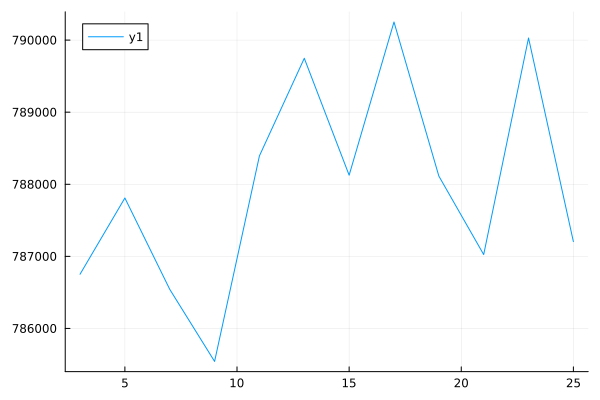

In [483]:
using Plots

plot(3:2:25,likehoods)

In [484]:
lattice = hmm_lattice(period_1,5)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

785652.8658551299

5-element Vector{Vector{Float64}}:
 [0.13082915258294955, 0.042214936164240366]
 [0.07806797401757157, 0.01230000000000085]
 [-0.03375019313830293, 0.053774476212575396]
 [0.1364925092039494, 0.07354577563578121]
 [0.06916336476564552, 0.022330088715729723]

5×5 Matrix{Float64}:
 0.310765  0.186265  0.20986   0.13237   0.160739
 0.306259  0.188561  0.211555  0.134897  0.158727
 0.299476  0.181753  0.206555  0.151876  0.16034
 0.307711  0.185944  0.191516  0.149274  0.165554
 0.297876  0.185003  0.202656  0.151575  0.16289

In [485]:
lattice = hmm_lattice(period_1,13)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

787005.5650443026

13-element Vector{Vector{Float64}}:
 [0.07806797401757201, 0.01230000000000447]
 [-0.10717543699949203, 0.024720178004391528]
 [-0.056433883817691065, 0.07147543855269302]
 [0.07265996957873379, 0.034244951267706825]
 [-0.20438761602617211, 0.047730018295541604]
 [0.19519176421066955, 0.03824634949535911]
 [0.20786327114973505, 0.06254626829999343]
 [0.03494938641044231, 0.015750430650739652]
 [0.12552506286273155, 0.08189895758508392]
 [0.2924442779409158, 0.042050820154430575]
 [0.17300793456321967, 0.020350301861639095]
 [0.08728111827851581, 0.060430389303393166]
 [-0.05133258611846188, 0.04401330772631771]

13×13 Matrix{Float64}:
 0.188561  0.0398272  0.0598499  0.115455  …  0.0573631  0.0816079  0.0853769
 0.182086  0.0400883  0.0503263  0.126383     0.0485496  0.100216   0.0832156
 0.170972  0.038636   0.0557865  0.12108      0.0493065  0.0972472  0.0732986
 0.196874  0.0445441  0.0561286  0.119679     0.0518136  0.0737119  0.0782755
 0.189425  0.039225   0.0649637  0.133427     0.0507544  0.0687018  0.0843163
 0.176094  0.0457392  0.0481427  0.116507  …  0.0582902  0.0963237  0.0858694
 0.177868  0.0415426  0.0555961  0.111378     0.0555499  0.067394   0.0871911
 0.183526  0.0467031  0.0510896  0.119948     0.0500744  0.0778135  0.0914098
 0.194354  0.0422241  0.0563684  0.11917      0.0541802  0.0841127  0.0805232
 0.191637  0.0358319  0.0531184  0.116217     0.045449   0.0704427  0.0983302
 0.18077   0.0372578  0.0610045  0.113819  …  0.0543194  0.0899859  0.0795375
 0.188857  0.0373679  0.0581407  0.129708     0.0529815  0.0848687  0.0863574
 0.177664  0.0339895  0.0565004  0.117958

In [486]:
lattice = hmm_lattice(period_1,13)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

785126.7308924778

13-element Vector{Vector{Float64}}:
 [0.029567631239174823, 0.03786553482659437]
 [-0.14398897168180846, 0.045667838714369746]
 [-0.024222146538951463, 0.020887859170350714]
 [0.16737800567027644, 0.03493518050482908]
 [0.26591677240385075, 0.02581104789375314]
 [0.0780679740175742, 0.012299999999997487]
 [-0.0949804868340784, 0.07623504221599864]
 [0.006883770970416592, 0.06264481840304681]
 [0.1392010535628926, 0.056920170996751965]
 [0.1187414729405268, 0.01689459724769219]
 [-0.16391911388058922, 0.026272815457322695]
 [0.13982141419866187, 0.07994884143072668]
 [0.27017584624320967, 0.05657156588360212]

13×13 Matrix{Float64}:
 0.111934  0.0737483  0.0344418  0.141849  …  0.0307117  0.0681633  0.0703746
 0.127811  0.0602855  0.0336891  0.128022     0.0255123  0.0773292  0.0852408
 0.107057  0.0752545  0.0424497  0.111391     0.0242151  0.0763895  0.0851505
 0.125133  0.0532098  0.0369175  0.130428     0.0375634  0.0636633  0.0822876
 0.1181    0.073944   0.0286344  0.124537     0.0245834  0.0678518  0.072545
 0.119153  0.0705339  0.0334729  0.120685  …  0.0307888  0.0553943  0.0774116
 0.124439  0.0727756  0.0278473  0.11452      0.0302956  0.0784586  0.0745357
 0.141633  0.0482005  0.0312321  0.118632     0.0288787  0.0459795  0.0828787
 0.108755  0.084995   0.0312438  0.115807     0.0294331  0.0784226  0.073913
 0.121094  0.078991   0.0352036  0.13765      0.0335695  0.0665992  0.0611822
 0.129279  0.0631799  0.0245999  0.148646  …  0.0347929  0.0689145  0.0525987
 0.113604  0.0599455  0.0348877  0.135319     0.0391683  0.0595268  0.0795328
 0.126793  0.0752365  0.033495   0.123139  

In [487]:
function ar1_simulator(a,b,std,init,n_steps)
    result =zeros(n_steps+1)
    result[1] = init
    for t in 2:n_steps+1
        result[t] = a + b*result[t-1] + rand(Normal(0,std))
    end
    return result
end

sims = ar1_simulator(0.0,0.95,1.0,0.0,100000)

reshape(sims,(1,100001))

quantile(sims,[0,0.25,0.5,0.75,1])


5-element Vector{Float64}:
 -14.059289734406107
  -2.063060694704428
   0.08505631793199087
   2.244440686278974
  13.575748859400525

In [488]:
reshape(sims,(1,100001))

1×100001 Matrix{Float64}:
 0.0  -0.394174  0.423918  1.43932  0.511792  …  -1.27724  -2.19169  -3.16965

In [498]:
likehoods = [hmm_lattice(reshape(sims,(1,100001)),n_nodes).likehood for n_nodes in 3:2:25]

12-element Vector{Float64}:
 -196611.71054643524
 -170685.23810348337
 -158397.6773333593
 -151798.12347588263
 -147942.07554751242
 -145886.48010648618
 -144437.2004239041
 -143707.16770147136
 -143058.5476433482
 -142654.89807204582
 -142414.78418995728
 -142212.82359080543

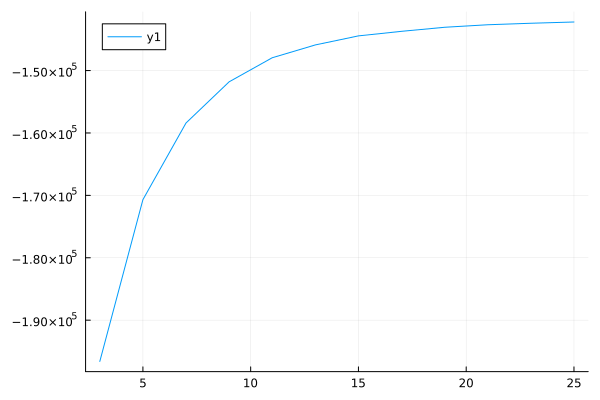

In [499]:
plot(3:2:25,likehoods)

In [495]:
lattice = hmm_lattice(reshape(sims,(1,100001)),7)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

-158397.67850657928

7-element Vector{Vector{Float64}}:
 [3.4415065640202513]
 [-3.3774583160197205]
 [0.04164368511691214]
 [-1.6053811614423508]
 [-5.824200852579075]
 [5.9382951992332]
 [1.6781328161505948]

7×7 Matrix{Float64}:
 0.79672       0.0          2.90722e-27   …  0.0572618     0.146018
 0.0           0.786677     1.48602e-17      0.0           1.50465e-157
 4.03481e-27   6.00876e-42  0.721225         3.62337e-251  0.139411
 3.22577e-191  0.111575     0.152931         0.0           7.82091e-14
 0.0           0.115104     5.10039e-133     0.0           0.0
 0.101656      0.0          5.40736e-62   …  0.898344      1.24883e-30
 0.112046      8.39768e-5   0.15527          3.25812e-72   0.732501

In [497]:
lattice = hmm_lattice(reshape(sims,(1,100001)),9)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

-151796.46899086668

9-element Vector{Vector{Float64}}:
 [1.298485012040171]
 [-2.7880250712909116]
 [6.589460720705303]
 [-1.4062787923809434]
 [2.7005847995365166]
 [-0.04805205324592844]
 [-6.642030917457744]
 [-4.386121271128345]
 [4.332795337352483]

9×9 Matrix{Float64}:
 0.617574      8.28814e-5    3.10338e-107  …  1.92381e-139  1.5692e-13
 2.67252e-50   0.650573      0.0              0.129178      0.0
 0.000234651   0.0           0.877322         0.0           0.122443
 0.00429987    0.169844      0.0              0.000383836   0.0
 0.200673      9.07548e-170  1.38373e-46      0.0           0.125377
 0.188574      0.00397229    0.0           …  2.6887e-63    2.12276e-112
 0.0           2.63864e-58   0.0              0.130237      0.0
 2.67996e-249  0.189089      0.0              0.750024      0.0
 0.000523735   0.0           0.0652267        0.0           0.750296

In [519]:
source_data = TimeArray(CSV.File("assets_data_03.24.csv", delim=';', dateformat=Dict("Date" => "dd.mm.yyyy"), decimal=','),timestamp=:Date)



MethodError: MethodError: no method matching TimeArray(::Vector{Union{Missing, Date}}, ::Matrix{Union{Missing, Float64}}, ::Vector{Symbol}, ::CSV.File; unchecked::Bool)

Closest candidates are:
  TimeArray(!Matched::AbstractVector{D}, ::AbstractArray{T, N}, ::Vector{Symbol}, ::Any; args...) where {T, N, D<:TimeType}
   @ TimeSeries C:\Users\matsz\.julia\packages\TimeSeries\zx7sJ\src\timearray.jl:89
  TimeArray(!Matched::D, ::AbstractArray{T, N}, ::Vector{Symbol}, ::Any; args...) where {T, N, D<:TimeType}
   @ TimeSeries C:\Users\matsz\.julia\packages\TimeSeries\zx7sJ\src\timearray.jl:94
  TimeArray(!Matched::AbstractVector{D}, ::AbstractArray{T, N}, !Matched::Vector{S}, ::Any; args...) where {T, N, D<:TimeType, S<:AbstractString}
   @ TimeSeries deprecated.jl:103
  ...


In [508]:
returns_yearly = percentchange(collapse(source_data,year, last))

52×5 TimeArray{Union{Missing, Float64}, 2, Date, Matrix{Union{Missing, Float64}}} 1973-12-31 to 2024-03-31
┌────────────┬────────────┬────────────┬──────────────┬────────────┬────────────
│            │ ACWI_Net   │ USDPLN     │ ACWI_Net_PLN │ CPI_USA    │ CPI_PLN   ⋯
├────────────┼────────────┼────────────┼──────────────┼────────────┼────────────
│ 1973-12-31 │    missing │    missing │      missing │  0.0870605 │     missi ⋯
│ 1974-12-31 │    missing │    missing │      missing │   0.123377 │     missi ⋯
│ 1975-12-31 │    missing │    missing │      missing │  0.0693605 │     missi ⋯
│ 1976-12-31 │    missing │    missing │      missing │  0.0486505 │     missi ⋯
│ 1977-12-31 │    missing │    missing │      missing │  0.0670123 │     missi ⋯
│ 1978-12-31 │    missing │    missing │      missing │   0.090177 │     missi ⋯
│ 1979-12-31 │    missing │    missing │      missing │   0.132939 │     missi ⋯
│ 1980-12-31 │    missing │    missing │      missing │   0.125161 │     missi ⋯
│ 

In [502]:
val = eachcol(values(from(returns_yearly[:ACWI_Net_PLN],Date(2003,02,01))))

[percentile(a,[2, 5, 25, 50, 75, 95, 98]) for a in val]

1-element Vector{Vector{Float64}}:
 [-0.225037818300221, -0.11150993397204947, 0.03390535467137583, 0.09733228505343647, 0.19875932356089762, 0.30291930341482903, 0.3077251511404324]

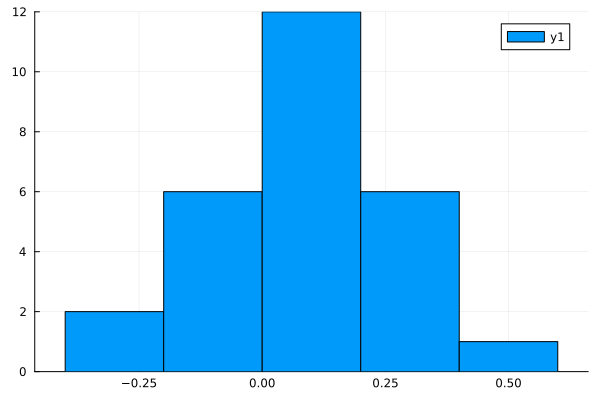

In [518]:
acwi_pln_y = from(returns_yearly[:ACWI_Net_PLN],Date(1998,02,01))
histogram(values(acwi_pln_y))

In [320]:
acwi_cpipln = identity.(values(from(returns[:ACWI_Net_PLN,:CPI_PLN],Date(2003,02,01))))

254×2 Matrix{Float64}:
  0.0051036     0.000927653
  0.0430686     0.00277912
  0.0118412     0.0018489
  0.0300994     0.0
  0.0670022    -0.000924682
  0.0132941    -0.00370334
  0.0495565    -0.00371711
  0.000195397   0.0046439
  0.0782452     0.00554541
 -0.0161735     0.00276122
  ⋮            
  0.0208096    -0.00221661
  0.000986609   0.0
  0.0154043    -0.00389282
 -0.066645      0.00278164
  0.0356998     0.00719694
  0.0310713     0.00110186
  0.0233511     0.00384933
  0.0394925     0.00274048
  0.0298368     0.00218699

In [321]:
transpose(acwi_cpipln)

2×254 transpose(::Matrix{Float64}) with eltype Float64:
 0.0051036    0.0430686   0.0118412  …  0.0233511   0.0394925   0.0298368
 0.000927653  0.00277912  0.0018489     0.00384933  0.00274048  0.00218699

In [322]:
state, probs = cluster(transpose(acwi_cpipln),4)
display(state*12)
display(probs)


2×4 Matrix{Float64}:
 0.506915   -0.741961   -0.0241622  -0.0317024
 0.0235401   0.0357811   0.0073365   0.143168

4-element Vector{Float64}:
 0.33858267716535434
 0.09055118110236221
 0.44881889763779526
 0.1220472440944882

In [323]:
acwi_cpiusd = identity.(values(from(returns[:ACWI_Net,:CPI_USA],Date(1988,01,01))))

state, probs = cluster(transpose(acwi_cpiusd),3)

display(state)
display(probs)

2×3 Matrix{Float64}:
 0.0208741    0.0300136    -0.0488946
 0.00509747  -0.000185102   0.00239701

3-element Vector{Float64}:
 0.34022988505747126
 0.39770114942528734
 0.2620689655172414